## What species are most commonly present
- Most commonly present 
- Most abundant (on average)
- which ones change when adding new MAGs

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from functools import reduce
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [18]:
df1 = pd.read_csv('../data/250830_tax_species.gtdb.summary.csv')
df1 = df1.rename(columns={"n_found": "n_found_gtdb"})
df1 = df1.rename(columns={"avg_fraction": "avg_fraction_gtdb"})


In [19]:
df2 = pd.read_csv('../data/250830_tax_species.gtdbmag.summary.csv')
df2 = df2.rename(columns={"n_found": "n_found_gtdbmag"})
df2 = df2.rename(columns={"avg_fraction": "avg_fraction_gtdbmag"})


In [20]:
# merge
df =pd.merge(df1, df2, on="lineage", how="outer")
df = df.fillna(0)

df = df[df["lineage"] != "unclassified"]

In [21]:
# for these species I want number of strains
df["species"] = df["lineage"].str.split(";s__").str[-1]
df["genus"] = df["lineage"].str.split(";g__").str[1].str.split(";").str[0]

In [22]:
# n_metaG =  300
# df = df[(df["n_found_gtdbmag"] >= n_metaG)]


In [23]:
len(df)

55931

In [24]:
df["n_found_gtdbmag"] = df["n_found_gtdbmag"].astype(int)

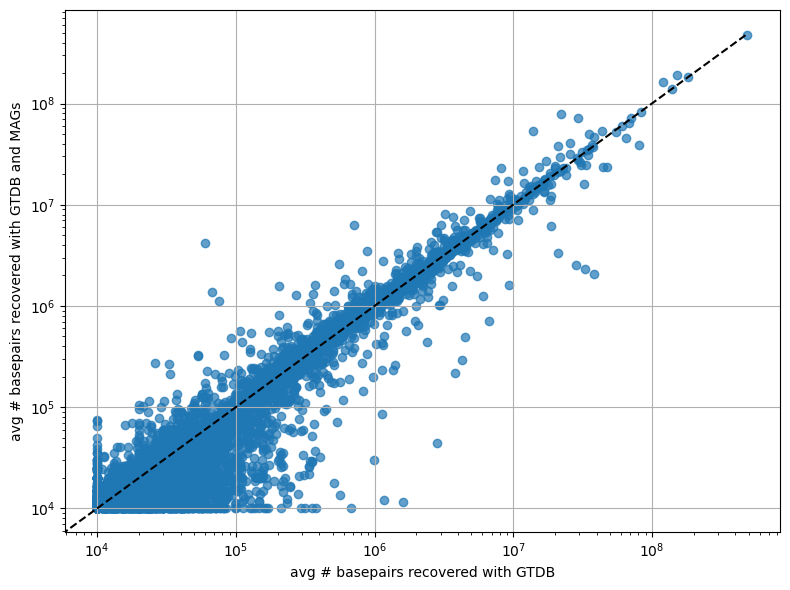

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
plt.xlabel("avg_fraction_gtdb")
plt.ylabel("avg_fraction_gtdbmag")
lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
        max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

plt.plot(lims, lims, linestyle="--", color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("avg # basepairs recovered with GTDB")
plt.ylabel("avg # basepairs recovered with GTDB and MAGs")
#plt.title("Scatterplot of avg_gtdb vs avg_gtdbmag per species")
plt.grid(True)
plt.tight_layout()
# plt.show()
#plt.savefig('../plots/250908_hashes_gtdb.v.MAGs.genus.png')

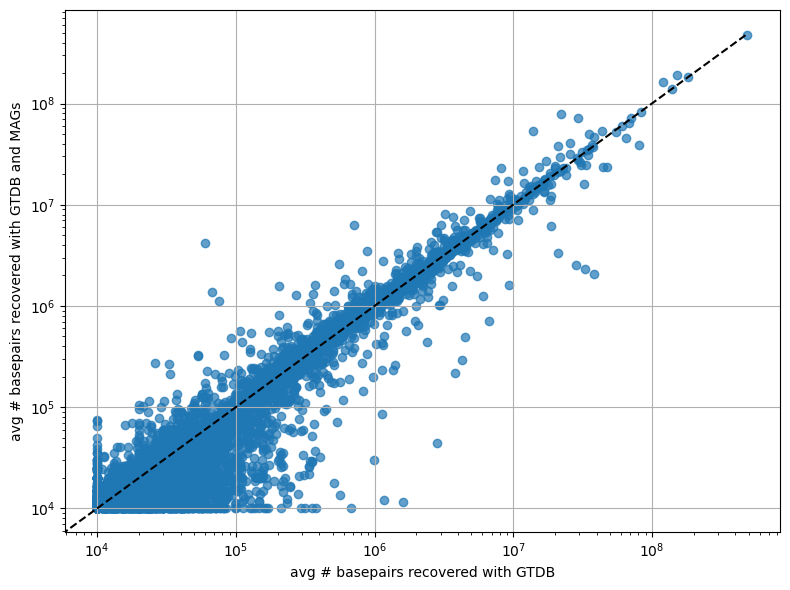

In [26]:

plt.figure(figsize=(8,6))
plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
plt.xlabel("avg_fraction_gtdb")
plt.ylabel("avg_fraction_gtdbmag")
lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
        max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

plt.plot(lims, lims, linestyle="--", color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("avg # basepairs recovered with GTDB")
plt.ylabel("avg # basepairs recovered with GTDB and MAGs")
#plt.title("Scatterplot of avg_gtdb vs avg_gtdbmag per species")
plt.grid(True)
plt.tight_layout()

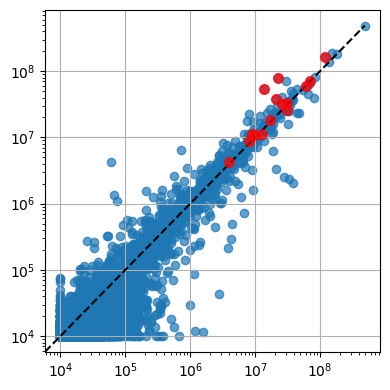

In [27]:
top10 = df.nlargest(15, "n_found_gtdbmag")

plt.figure(figsize=(4,4))
#plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
plt.xscale("log")
plt.yscale("log")
# plt.xlabel("avg # hashes recovered with GTDB")
# plt.ylabel("avg # hashes recovered with GTDB and MAGs")

lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
        max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

plt.plot(lims, lims, linestyle="--", color="black")


# scatter for all points
plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)

# highlight top10
plt.scatter(top10["avg_fraction_gtdb"], top10["avg_fraction_gtdbmag"],
            color="red", s=50, zorder=3, alpha=0.7)

# for i, row in top10.iterrows():
#     label = f"{row['species']}, {row['n_found_gtdbmag']}"
#     plt.text(row["avg_fraction_gtdb"], row["avg_fraction_gtdbmag"], label,
#              fontsize=9, ha="left", va="bottom",)

plt.grid(True)
plt.tight_layout()


plt.savefig('../../2025-pig-corespp/plots/251023_all_spp.small.png')


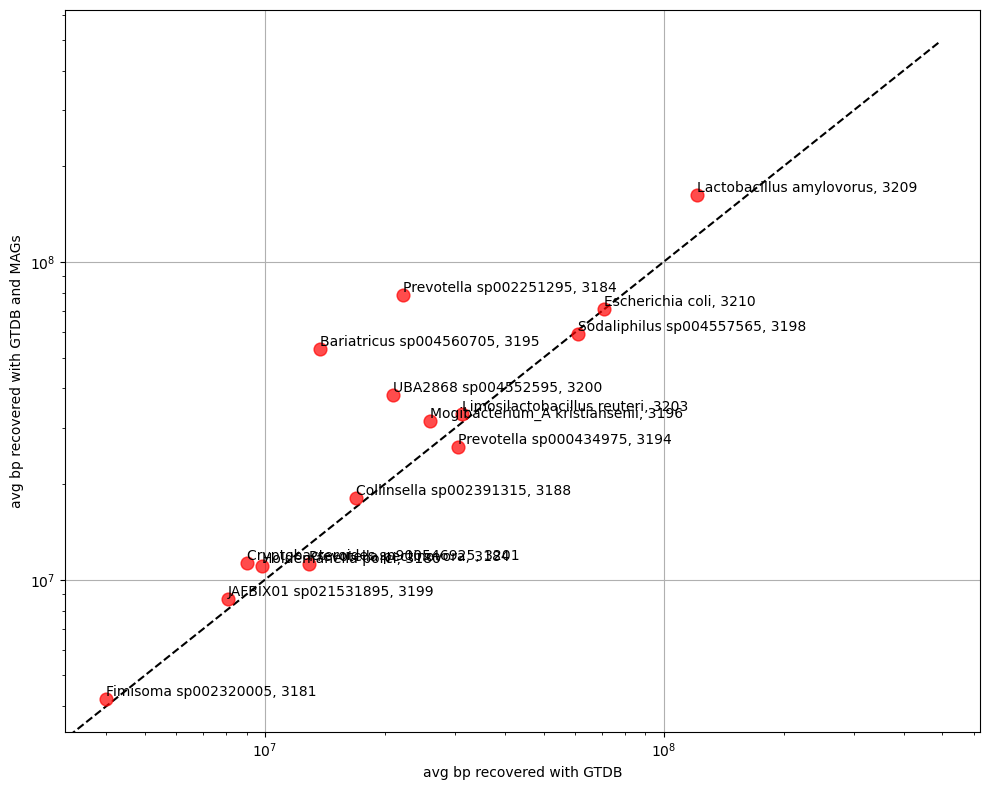

In [28]:
top10 = df.nlargest(15, "n_found_gtdbmag")

plt.figure(figsize=(10,8))
#plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("avg bp recovered with GTDB")
plt.ylabel("avg bp recovered with GTDB and MAGs")

lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
        max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

plt.plot(lims, lims, linestyle="--", color="black")


# scatter for all points
# plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)

# highlight top10
plt.scatter(top10["avg_fraction_gtdb"], top10["avg_fraction_gtdbmag"],
            color="red", s=85, zorder=3, alpha=0.7)

for i, row in top10.iterrows():
    label = f"{row['species']}, {row['n_found_gtdbmag']}"
    plt.text(row["avg_fraction_gtdb"], row["avg_fraction_gtdbmag"], label,
             fontsize=10, ha="left", va="bottom",)

plt.grid(True)
plt.tight_layout()
plt.savefig('../../2025-pig-corespp/plots/251023_core_spp.pdf')


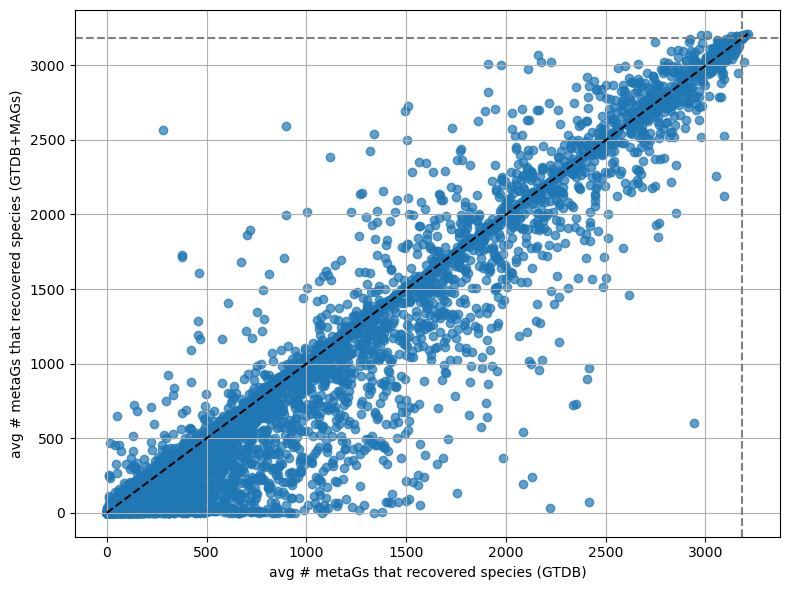

In [29]:
# Would it have been core without binning?
plt.figure(figsize=(8,6))
plt.scatter(df["n_found_gtdb"], df["n_found_gtdbmag"], alpha=0.7)



plt.plot([0, df["n_found_gtdb"].max()], [0, df["n_found_gtdbmag"].max()], linestyle="--", color="black")



# horizontal
plt.axhline(y=3183, linestyle="--", color="gray")

# vertical
plt.axvline(x=3183, linestyle="--", color="gray")

plt.xlabel("avg # metaGs that recovered species (GTDB)")
plt.ylabel("avg # metaGs that recovered species (GTDB+MAGs)")
#plt.title("Scatterplot of avg_gtdb vs avg_gtdbmag per species")
plt.grid(True)
plt.tight_layout()
# plt.show()
#plt.savefig('../plots/250908_hashes_gtdb.v.MAGs.genus.png')

In [30]:
# Highlight the core spp
n_metaG =  3183
core_spp = df[(df["n_found_gtdbmag"] >= n_metaG)]
len(core_spp)


13

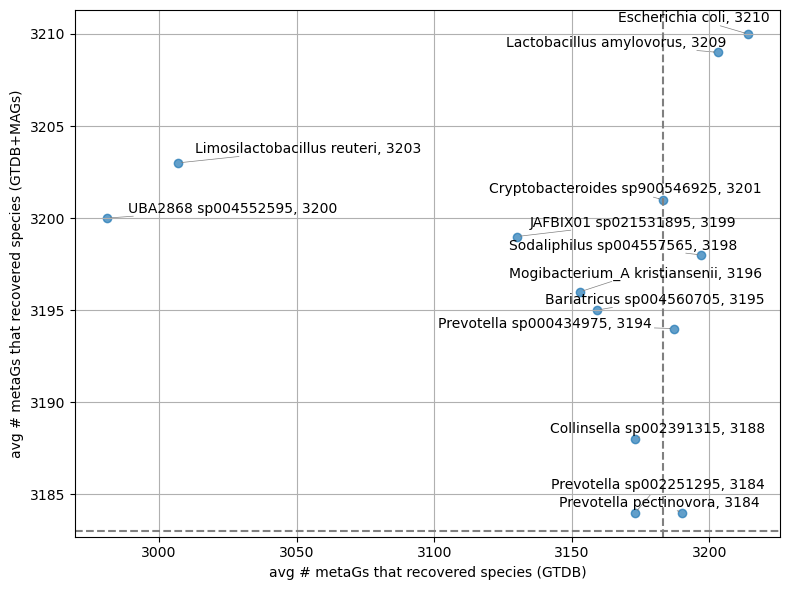

In [31]:
# Would it have been core without binning?
plt.figure(figsize=(8,6))
plt.scatter(core_spp["n_found_gtdb"], core_spp["n_found_gtdbmag"], alpha=0.7)
# for i, row in core_spp.iterrows():
#     label = f"{row['species']}, {row['n_found_gtdbmag']}"
#     plt.text(row["n_found_gtdb"], row["n_found_gtdbmag"], label,
#              fontsize=10, ha="left", va="bottom",)

texts = []
for i, row in core_spp.iterrows():
    label = f"{row['species']}, {row['n_found_gtdbmag']}"
    texts.append(
        plt.text(row["n_found_gtdb"], row["n_found_gtdbmag"], label,
                 fontsize=10, ha="left", va="bottom")
    )

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))
    

# horizontal
plt.axhline(y=3183, linestyle="--", color="gray")

# vertical
plt.axvline(x=3183, linestyle="--", color="gray")

plt.xlabel("avg # metaGs that recovered species (GTDB)")
plt.ylabel("avg # metaGs that recovered species (GTDB+MAGs)")
#plt.title("Scatterplot of avg_gtdb vs avg_gtdbmag per species")
plt.grid(True)
plt.tight_layout()
# plt.show()
#plt.savefig('../plots/250908_hashes_gtdb.v.MAGs.genus.png')

In [32]:
# top10 = df.nlargest(15, "n_found_gtdbmag")

# plt.figure(figsize=(4,4))
# #plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
# plt.xscale("log")
# plt.yscale("log")
# # plt.xlabel("avg # hashes recovered with GTDB")
# # plt.ylabel("avg # hashes recovered with GTDB and MAGs")

# lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
#         max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

# plt.plot(lims, lims, linestyle="--", color="black")


# # scatter for all points
# plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)

# # highlight top10
# plt.scatter(top10["avg_fraction_gtdb"], top10["avg_fraction_gtdbmag"],
#             color="red", s=50, zorder=3, alpha=0.7)

# # for i, row in top10.iterrows():
# #     label = f"{row['species']}, {row['n_found_gtdbmag']}"
# #     plt.text(row["avg_fraction_gtdb"], row["avg_fraction_gtdbmag"], label,
# #              fontsize=9, ha="left", va="bottom",)

# plt.grid(True)
# plt.tight_layout()


# plt.savefig('../../2025-pig-corespp/plots/251023_all_spp.small.png')
